<a href="https://colab.research.google.com/github/koustav7/summit-minds-submission/blob/master/koustav_chakraborty_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import pandas as pd
from pandas.io.json import json_normalize

In [0]:
# Reading the data
data= pd.read_json('customersdata.json',lines= True)
data.head()

,fraudulent,customer,orders,paymentMethods,transactions
0,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...","[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...","[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,False,"{'customerEmail': 'andersonwilliam@yahoo.com',...","[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,False,"{'customerEmail': 'rubenjuarez@yahoo.com', 'cu...","[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,True,"{'customerEmail': 'uchen@malone.com', 'custome...","[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."


Decoding the json file

In [0]:
l=[]
for i in range(len(data)):
  for j in data['orders'][i]:
    l.append([data['fraudulent'][i],data['customer'][i],j,data['paymentMethods'][i],data['transactions'][i]])
data1= pd.DataFrame(l,columns=['fraudulent','customer','orders','paymentMethods','transactions'])
l1=[]
for i in range(len(data1)):
  for j in data1['paymentMethods'][i]:
    l1.append([data1['fraudulent'][i],data1['customer'][i],data1['orders'][i],j,data1['transactions'][i]])
data2= pd.DataFrame(l1,columns=['fraudulent','customer','orders','paymentMethods','transactions'])
l2=[]
for i in range(len(data2)):
  for j in data2['transactions'][i]:
    l2.append([data2['fraudulent'][i],data2['customer'][i],data2['orders'][i],data2['paymentMethods'][i],j])
data3= pd.DataFrame(l2,columns=['fraudulent','customer','orders','paymentMethods','transactions'])
data3.head()


,fraudulent,customer,orders,paymentMethods,transactions
0,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...","{'orderId': 'vjbdvd', 'orderAmount': 18, 'orde...","{'paymentMethodId': 'wt07xm68b', 'paymentMetho...","{'transactionId': 'a9lcj51r', 'orderId': 'vjbd..."
1,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...","{'orderId': 'vjbdvd', 'orderAmount': 18, 'orde...","{'paymentMethodId': 'wt07xm68b', 'paymentMetho...","{'transactionId': 'y4wcv03i', 'orderId': 'yp6x..."
2,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...","{'orderId': 'yp6x27', 'orderAmount': 26, 'orde...","{'paymentMethodId': 'wt07xm68b', 'paymentMetho...","{'transactionId': 'a9lcj51r', 'orderId': 'vjbd..."
3,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...","{'orderId': 'yp6x27', 'orderAmount': 26, 'orde...","{'paymentMethodId': 'wt07xm68b', 'paymentMetho...","{'transactionId': 'y4wcv03i', 'orderId': 'yp6x..."
4,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...","{'orderId': 'nlghpa', 'orderAmount': 45, 'orde...","{'paymentMethodId': 'y3xp697jx', 'paymentMetho...","{'transactionId': '5mi94sfw', 'orderId': 'nlgh..."


In [0]:
# taking the information out from key value pair
cus = json_normalize(data= data3.customer)
ordr= json_normalize(data= data3.orders)
paymnt= json_normalize(data= data3.paymentMethods)
trans= json_normalize(data= data3.transactions)

In [0]:
# creating a dataframe containing decoded data
df= pd.concat([data3['fraudulent'],cus,ordr,paymnt,trans],axis=1)
df.head()

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId,orderAmount,orderState,orderShippingAddress,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionId,orderId,paymentMethodId,transactionAmount,transactionFailed
0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,vjbdvd,wt07xm68b,18,False
1,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,y4wcv03i,yp6x27,wt07xm68b,26,False
2,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,vjbdvd,wt07xm68b,18,False
3,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,y4wcv03i,yp6x27,wt07xm68b,26,False
4,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,5mi94sfw,nlghpa,41ug157xz,45,False


In [0]:
df.columns

Index(['fraudulent', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'orderId', 'orderAmount',
       'orderState', 'orderShippingAddress', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer', 'transactionId',
       'orderId', 'paymentMethodId', 'transactionAmount', 'transactionFailed'],
      dtype='object')

In the above cell we can see orderId and paymentMethodId are repeating so we renaming the 2nd pair of those columns as orderId_1 and paymentMethodId_1

In [0]:
col= ['fraudulent', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'orderId', 'orderAmount',
       'orderState', 'orderShippingAddress', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer', 'transactionId',
       'orderId_1', 'paymentMethodId_1', 'transactionAmount', 'transactionFailed']
df.columns= col
df.head()

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId,orderAmount,orderState,orderShippingAddress,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionId,orderId_1,paymentMethodId_1,transactionAmount,transactionFailed
0,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,vjbdvd,wt07xm68b,18,False
1,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",vjbdvd,18,pending,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,y4wcv03i,yp6x27,wt07xm68b,26,False
2,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,a9lcj51r,vjbdvd,wt07xm68b,18,False
3,False,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",yp6x27,26,fulfilled,"5493 Jones Islands\nBrownside, CA 51896",wt07xm68b,True,card,JCB 16 digit,Citizens First Banks,y4wcv03i,yp6x27,wt07xm68b,26,False
4,True,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,nlghpa,45,fulfilled,"898 Henry Ports\nNew Keithview, CA 95893-2497",y3xp697jx,True,bitcoin,VISA 16 digit,Solace Banks,5mi94sfw,nlghpa,41ug157xz,45,False


In [0]:
final_data= df
final_data.shape

(6550, 20)

In [0]:
# No null value present in the data
final_data.isnull().any()

fraudulent                          False
customerEmail                       False
customerPhone                       False
customerDevice                      False
customerIPAddress                   False
customerBillingAddress              False
orderId                             False
orderAmount                         False
orderState                          False
orderShippingAddress                False
paymentMethodId                     False
paymentMethodRegistrationFailure    False
paymentMethodType                   False
paymentMethodProvider               False
paymentMethodIssuer                 False
transactionId                       False
orderId_1                           False
paymentMethodId_1                   False
transactionAmount                   False
transactionFailed                   False
dtype: bool

In [0]:
# Data type present in the dataframe
final_data.dtypes

fraudulent                            bool
customerEmail                       object
customerPhone                       object
customerDevice                      object
customerIPAddress                   object
customerBillingAddress              object
orderId                             object
orderAmount                          int64
orderState                          object
orderShippingAddress                object
paymentMethodId                     object
paymentMethodRegistrationFailure      bool
paymentMethodType                   object
paymentMethodProvider               object
paymentMethodIssuer                 object
transactionId                       object
orderId_1                           object
paymentMethodId_1                   object
transactionAmount                    int64
transactionFailed                     bool
dtype: object

In [0]:
# converting other datatyoes into numericals
from sklearn.preprocessing import LabelEncoder
encode= LabelEncoder()
final_data['fraudulent']= encode.fit_transform(final_data['fraudulent'])
final_data['customerEmail']= encode.fit_transform(final_data['customerEmail'])
final_data['customerPhone']= encode.fit_transform(final_data['customerPhone'])
final_data['customerIPAddress']= encode.fit_transform(final_data['customerIPAddress'])
final_data['customerDevice']= encode.fit_transform(final_data['customerDevice'])
final_data['customerBillingAddress']= encode.fit_transform(final_data['customerBillingAddress'])
final_data['orderId']= encode.fit_transform(final_data['orderId'])
final_data['orderState']= encode.fit_transform(final_data['orderState'])
final_data['orderShippingAddress']= encode.fit_transform(final_data['orderShippingAddress'])
final_data['paymentMethodId']= encode.fit_transform(final_data['paymentMethodId'])
final_data['paymentMethodRegistrationFailure']= encode.fit_transform(final_data['paymentMethodRegistrationFailure'])
final_data['paymentMethodType']= encode.fit_transform(final_data['paymentMethodType'])
final_data['paymentMethodProvider']= encode.fit_transform(final_data['paymentMethodProvider'])
final_data['paymentMethodIssuer']= encode.fit_transform(final_data['paymentMethodIssuer'])
final_data['transactionId']= encode.fit_transform(final_data['transactionId'])
final_data['orderId_1']= encode.fit_transform(final_data['orderId_1'])
final_data['paymentMethodId_1']= encode.fit_transform(final_data['paymentMethodId_1'])
final_data['transactionFailed']= encode.fit_transform(final_data['transactionFailed'])

In [0]:
# a portion of converted dataframe 
final_data.head()

,fraudulent,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,orderId,orderAmount,orderState,orderShippingAddress,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,paymentMethodIssuer,transactionId,orderId_1,paymentMethodId_1,transactionAmount,transactionFailed
0,0,64,97,133,94,70,413,18,2,142,299,1,2,4,3,184,413,215,18,0
1,0,64,97,133,94,70,413,18,2,142,299,1,2,4,3,598,458,215,26,0
2,0,64,97,133,94,70,458,26,1,142,299,1,2,4,3,184,413,215,18,0
3,0,64,97,133,94,70,458,26,1,142,299,1,2,4,3,598,458,215,26,0
4,1,43,70,100,40,38,314,45,1,224,310,1,1,8,9,94,314,29,45,0


In [0]:
# getting training and testing data for getting the classification model
from sklearn.model_selection import train_test_split
X= final_data.drop(columns=['fraudulent'])
y= final_data['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [0]:
# Training the model(Random Forrest Classifier) 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# accuracy on training data
model.score(X_test, y_test)

0.9984732824427481

Here I will show which are features most important or not

In [0]:
dat= df

In [0]:
dat.dtypes

fraudulent                          int64
customerEmail                       int64
customerPhone                       int64
customerDevice                      int64
customerIPAddress                   int64
customerBillingAddress              int64
orderId                             int64
orderAmount                         int64
orderState                          int64
orderShippingAddress                int64
paymentMethodId                     int64
paymentMethodRegistrationFailure    int64
paymentMethodType                   int64
paymentMethodProvider               int64
paymentMethodIssuer                 int64
transactionId                       int64
orderId_1                           int64
paymentMethodId_1                   int64
transactionAmount                   int64
transactionFailed                   int64
dtype: object

In [0]:
dat.columns

Index(['fraudulent', 'customerEmail', 'customerPhone', 'customerDevice',
       'customerIPAddress', 'customerBillingAddress', 'orderId', 'orderAmount',
       'orderState', 'orderShippingAddress', 'paymentMethodId',
       'paymentMethodRegistrationFailure', 'paymentMethodType',
       'paymentMethodProvider', 'paymentMethodIssuer', 'transactionId',
       'orderId_1', 'paymentMethodId_1', 'transactionAmount',
       'transactionFailed'],
      dtype='object')

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = dat.corr()

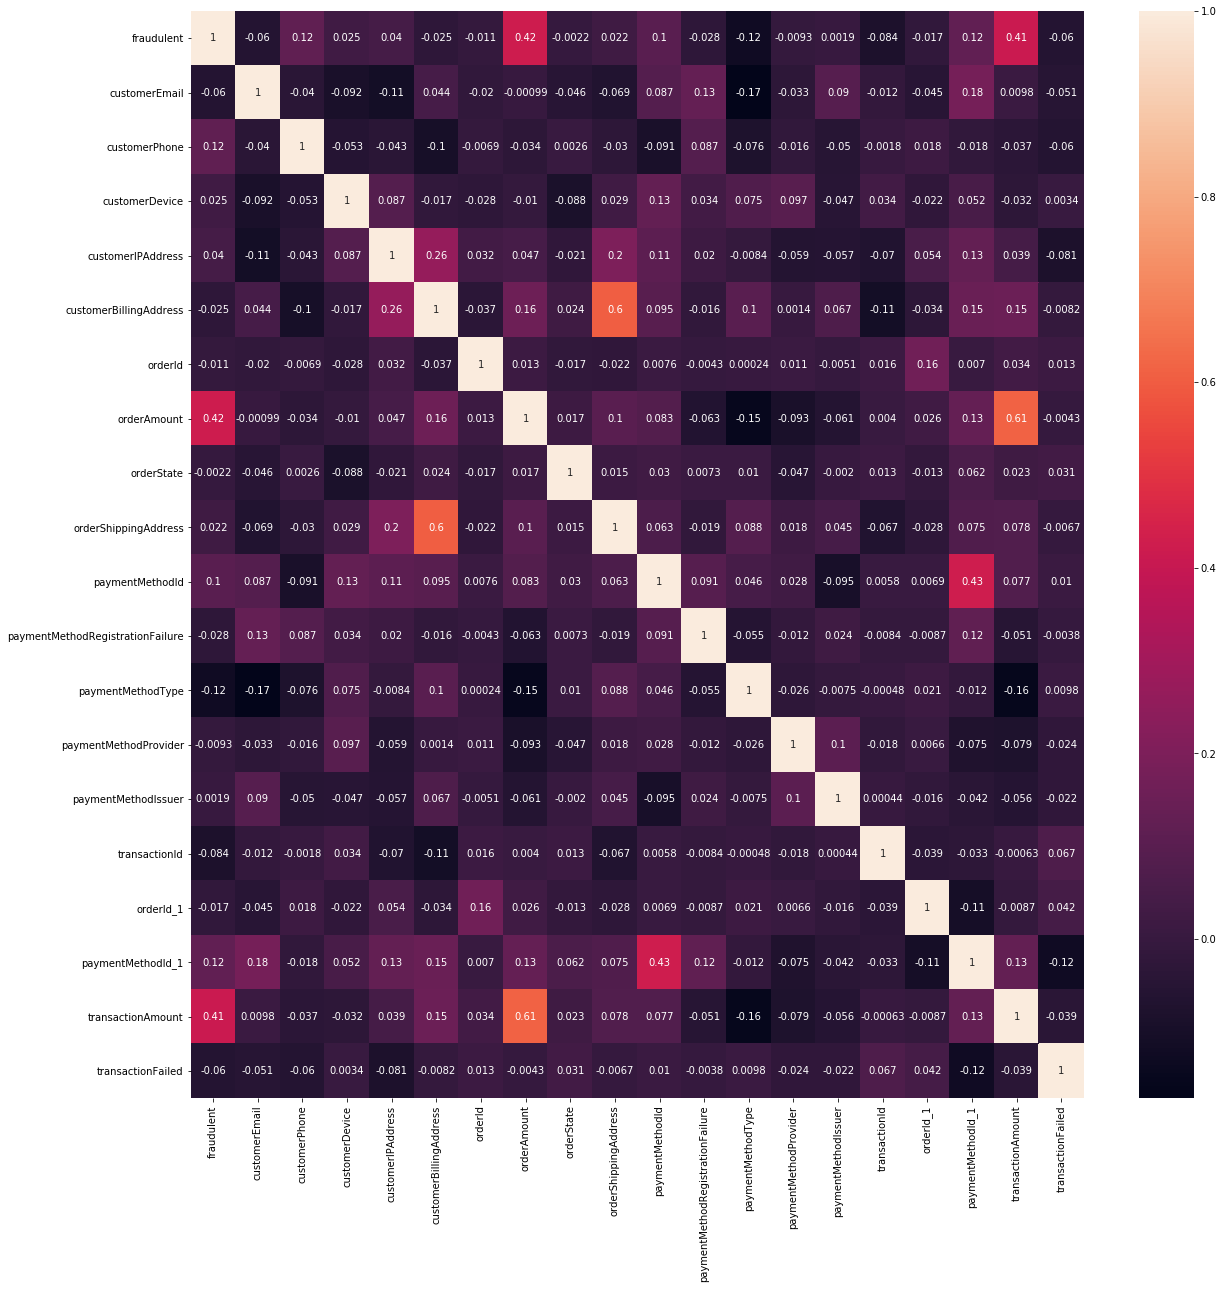

In [0]:
plt.figure(figsize=(20,20))
g= sns.heatmap(corrmat,annot=True)

As we have plotted the heatmap we can see correlation between any two variable is not to high(value near to 1 or -1) so we are keeping all 19 atributes.